# Kryptologie Lab



In [3]:
!pip install -q tqdm

In [4]:
import matplotlib.pyplot as plt
import statistics
from tqdm.notebook import tqdm, trange
import numpy as np

In [5]:
def encryptVigenere(input, key):
    output = ""
    keyIndex = 0
    for i, v in enumerate(input):
        output += chr((ord(v) + key[keyIndex]) % 128)
        keyIndex += 1
        if (keyIndex >= len(key)):
            keyIndex = 0
    return output

def decryptVigenere(input, key):
    output = ""
    keyIndex = 0
    for i, v in enumerate(input):
        output += chr((ord(v) - key[keyIndex]) % 128)
        keyIndex += 1
        if (keyIndex >= len(key)):
            keyIndex = 0
    return output

In [6]:
def countFrequencies(string):
    frequencies = dict()
    for char in string:
        frequencies[char] = frequencies.get(char,0) + 1
    return frequencies

def koinzidenz(text):
    frequencies = countFrequencies(text)
    n = len(text)
    sum = 0
    if (n-1 == 0):
        return 0
    for i in range(128):
        h = frequencies.get(chr(i), 0)
        sum += h * (h - 1)
    return sum / (n * (n-1))

def getChunks(text, length):
    indices = [list(range(i, len(text), length)) for i in range(0, length)]
    chunks = []
    for i in range(len(indices)):
        chunks.append("")
        for index in indices[i]:
            chunks[i] += text[index]
    return chunks

def koinzidenzAnalyse(text, i):
    chunks = getChunks(text, i)
    koinzidenzen = [koinzidenz(chunk) for chunk in chunks]
    return statistics.mean(koinzidenzen)

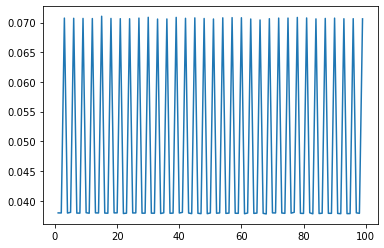

Hohe Inzizdenz = 0,07


In [7]:
with open('Lorem1.txt') as f:
    lines = f.readlines()
    text = "".join(lines)
    x = range(1,100)
    y = [koinzidenzAnalyse(text,i) for i in x]
    plt.plot(x, y)
    plt.show()

print("Hohe Inzizdenz = 0,07")

In [8]:
def getKeyLength(text, maxKeyLength, plot=False, threshold = 0.07):
    print("Determining key length...")
    x = range(1,maxKeyLength)
    y = [koinzidenzAnalyse(text,i) for i in x]
    plt.plot(x, y)
    plt.show()
    for i in range(1,maxKeyLength-1):
        if y[i] > threshold:
            return i+1
    y = np.array(y)
    return np.argmax(y[0])

def getKeyByAutodecrypting(text):
    frequencies = countFrequencies(text)
    max_key = max(frequencies, key=frequencies.get)
    return (ord(max_key) - ord(" ")) % 128

def decryptFile(file, maxKeyLength=100):
    print("Decrypting...")
    with open(file) as f:
        lines = f.readlines()
        text = "".join(lines)
        print("text length: ", len(text))
        keyLength = getKeyLength(text, maxKeyLength, plot=True)
        if (maxKeyLength == keyLength):
            print("abort.")
            return
        print("key length: ", keyLength)
        chunks = getChunks(text, keyLength)
        print("Determining key...")
        key = [getKeyByAutodecrypting(chunk) for chunk in tqdm(chunks)]
        print("key: ", key)
        print("Decrypted message:")
        print(decryptVigenere(text, key)[:100] + "...")

Decrypting...
text length:  67412
Determining key length...


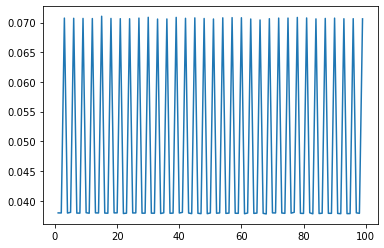

key length:  3
Determining key...


  0%|          | 0/3 [00:00<?, ?it/s]

key:  [115, 116, 122]
Decrypted message:
QUISQUE RUTRUM. AENEAN IMPERDIET. ETIAM ULTRICIES NISI VEL AUGUE. CURABITUR ULLAMCORPER ULTRICIES NI...


In [9]:
decryptFile("Lorem1.txt")

Decrypting...
text length:  67378
Determining key length...


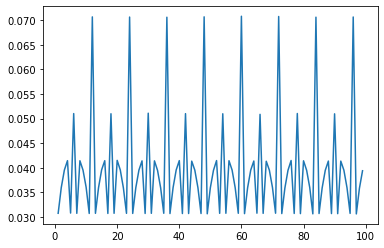

key length:  12
Determining key...


  0%|          | 0/12 [00:00<?, ?it/s]

key:  [115, 116, 122, 117, 118, 120, 121, 115, 118, 117, 115, 116]
Decrypted message:
ETIAM ULTRICIES NISI VEL AUGUE. CURABITUR ULLAMCORPER ULTRICIES NISI. NAM EGET DUI. ETIAM RHONCUS. M...


In [10]:
decryptFile("Lorem2.txt")

Decrypting...
text length:  67346
Determining key length...


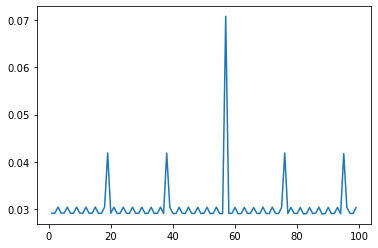

key length:  57
Determining key...


  0%|          | 0/57 [00:00<?, ?it/s]

key:  [115, 116, 122, 117, 118, 120, 121, 115, 118, 117, 115, 116, 115, 116, 117, 121, 122, 120, 119, 122, 121, 117, 115, 116, 118, 122, 119, 120, 121, 115, 119, 119, 116, 120, 121, 117, 122, 120, 119, 115, 116, 119, 120, 122, 121, 117, 115, 115, 116, 122, 117, 119, 119, 120, 117, 121, 122]
Decrypted message:
CURABITUR ULLAMCORPER ULTRICIES NISI. NAM EGET DUI. ETIAM RHONCUS. MAECENAS TEMPUS. TELLUS EGET COND...


In [11]:
decryptFile("Lorem3.txt")